### MILESTONE 2. 2º PARTE. Prototypes to integrate orbits with functions

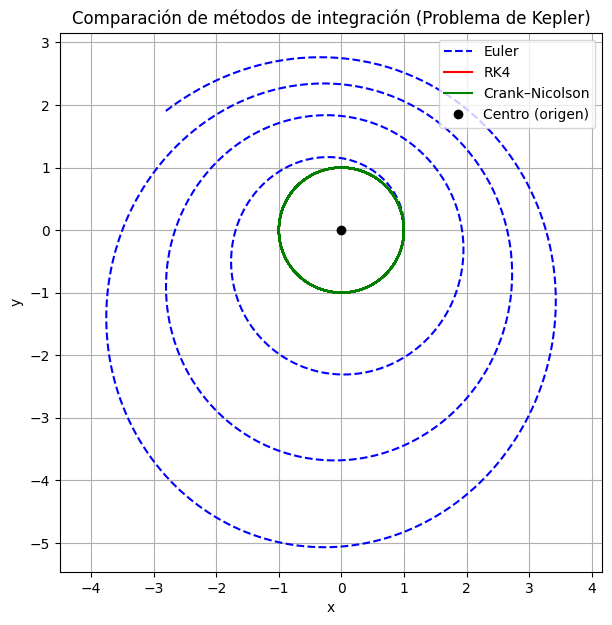

In [3]:
import numpy as np  

def cauchy_integration(F, U0, T, N, method):
    
    U0 = np.array(U0, dtype=float).flatten()

    dimension_U0 = len(U0)

    Delta_t = T/N
    U_solucion = np.zeros((N+1, dimension_U0))
    U_solucion[0,:]= U0 
    vector_tiempos= np.linspace(0, T, N+1)

    maxiter = 100 # Para el Crank-Nicholson
    tol = 1e-10   # Para Crank-Nicholson

    for n in range(N):

        if method == "euler":

            U_solucion[n+1, :] = U_solucion[n, :]  + Delta_t*F(U_solucion[n, :], vector_tiempos[n])



        elif method == "rk4":
            
            k1 = F(U_solucion[n, :], vector_tiempos[n])
            k2 = F(U_solucion[n, :] + (Delta_t/2)*k1, vector_tiempos[n] + 0.5* Delta_t)
            k3 = F(U_solucion[n, :] + (Delta_t/2)*k2, vector_tiempos[n] + 0.5* Delta_t)
            k4 = F(U_solucion[n, :] + Delta_t*k3, vector_tiempos[n] + Delta_t)

            U_solucion[n+1, :] = U_solucion[n, :]  + (Delta_t/6)*(k1 + 2*k2 + 2*k3 + k4)


        elif method == "crank_nicholson":


                U_inicial= U_solucion[n,:]

                for k in range(maxiter):
                    
                    F_n = F(U_solucion[n, :], vector_tiempos[n])
                    F_siguiente = F(U_inicial, vector_tiempos[n] + Delta_t)

                
                    # valor de U
                    U_nueva = U_solucion[n,:] + (Delta_t/2)*(F_n+ F_siguiente)

                
                    if np.linalg.norm(U_nueva - U_inicial)<tol:
                        break

                    U_inicial=U_nueva

                U_solucion[n+1,:] = U_nueva




    return vector_tiempos, U_solucion

import matplotlib.pyplot as plt

def F(U, t):
        
            r = U[0:2]
            rd= U[2:4]

            return np.concatenate([rd, -r/np.linalg.norm(r)**3])

T = 100
N = 1000



U0 = np.array([1, 0, 0, 1])

vector_tiempos_euler, U_solucion_euler = cauchy_integration(F, U0, T, N, "euler")
vector_tiempos_rk4, U_solucion_rk4 = cauchy_integration(F, U0, T, N, "rk4")
vector_tiempos_cn, U_solucion_cn = cauchy_integration(F, U0, T, N, "crank_nicholson")

x_eu, y_eu = U_solucion_euler[:,0], U_solucion_euler[:,1]
x_rk, y_rk = U_solucion_rk4[:,0], U_solucion_rk4[:,1]
x_cn, y_cn = U_solucion_cn[:,0], U_solucion_cn[:,1]

# --- Gráficas ---
plt.figure(figsize=(7,7))
plt.plot(x_eu, y_eu, 'b--', label="Euler")
plt.plot(x_rk, y_rk, 'r-',  label="RK4")
plt.plot(x_cn, y_cn, 'g-',  label="Crank–Nicolson")
plt.plot(0, 0, 'ko', label="Centro (origen)")  # planeta en el origen
plt.axis('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparación de métodos de integración (Problema de Kepler)")
plt.legend()
plt.grid(True)
plt.show()
